# Computing Integral Image

## Formula

$I(x, y) = i(x,y) + I(x-1, y) + I(x, y-1) + I(x-1, y-1)$

where -- 

1. $(x, y)$ are the co-ordinate locations
2. $I$ is the integral image
3. $i$ is the original image 

In [1]:
# Load the required modules
%pylab inline
import cv2

Populating the interactive namespace from numpy and matplotlib


In [2]:
def imshow2(im_title, im):
    ''' This is function to display the image'''
    plt.figure()
    plt.title(im_title)
    plt.axis("off")
    if len(im.shape) == 2:
        plt.imshow(im, cmap = "gray")
    else:
        im_display = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
        plt.imshow(im_display)
    plt.show()

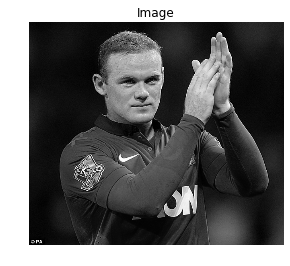

In [3]:
# Load and display the image
im = cv2.imread('../data/template-matching/wayne-rooney.jpg')
im_gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
imshow2("Image", im_gray)

In [4]:
# Create the integral image using OpenCV
int_im = cv2.integral(im_gray)
# TODO -- Write own implementation
# Box Filtering using integral image
int_im = np.zeros(im_gray.shape, np.int64)
filter_size = 25
for i in range(1, int_im.shape[0]):
    for j in range(1, int_im.shape[1]):
        int_im[i][j] = im_gray[i][j] + int_im[i-1][j] + int_im[i][j-1] - int_im[i-1][j-1]

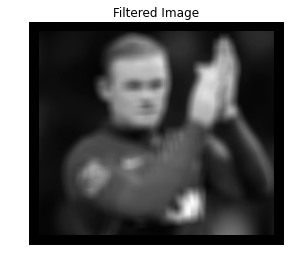

In [5]:
# Box Filtering using integral image
im_filtered = np.zeros(im_gray.shape, im_gray.dtype)
filter_size = 25
for i in range(filter_size, int_im.shape[0]-filter_size):
    for j in range(filter_size,int_im.shape[1]-filter_size):
        im_filtered[i][j] = (int_im[i][j] - int_im[i-filter_size][j] - int_im[i][j-filter_size] + int_im[i-filter_size][j-filter_size])/(filter_size*filter_size)
imshow2("Filtered Image", im_filtered)